In [3]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

In [2]:
!pip install yfinance

In [1]:
!pip install Riskfolio-Lib

In [4]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

Tickers I am interested in

In [5]:
assets = ['AMZN','AAPL','TSLA','GE','F','PFE','MSFT','JNJ','MRNA','IBM','BAC','CVX','BABA','BIDU','NIO','PDD','ROKU','NFLX','DIS']

In [6]:
# Date range
start = '2019-01-01'
end = '2021-12-01'

In [7]:
# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets


[*********************100%***********************]  19 of 19 completed


In [8]:
data.head()

AMZN         AAPL        TSLA  ...       ROKU       NFLX        DIS
Date                                            ...                                 
2019-01-02  38.326294  1539.130005  136.699997  ...  36.581043  32.520000  62.023998
2019-01-03  34.508709  1500.280029  130.600006  ...  35.557621  30.100000  60.071999
2019-01-04  35.981873  1575.390015  139.750000  ...  36.369587  33.730000  63.537998
2019-01-07  35.901768  1629.510010  143.100006  ...  36.564125  42.180000  66.991997
2019-01-08  36.586163  1656.579956  146.789993  ...  36.733295  40.880001  67.070000

[5 rows x 19 columns]

In [ ]:
# Calculating returns
Y = data[assets].pct_change().dropna()

display(Y.head())

AMZN      AAPL      TSLA  ...      ROKU      NFLX       DIS
Date                                      ...                              
2019-01-03 -0.099607 -0.025242 -0.044623  ... -0.027977 -0.074416 -0.031472
2019-01-04  0.042689  0.050064  0.070061  ...  0.022835  0.120598  0.057697
2019-01-07 -0.002226  0.034353  0.023971  ...  0.005349  0.250519  0.054361
2019-01-08  0.019063  0.016612  0.025786  ...  0.004626 -0.030820  0.001164
2019-01-09  0.016982  0.001714  0.034948  ... -0.002072  0.029843  0.009483

[5 rows x 19 columns]

[]

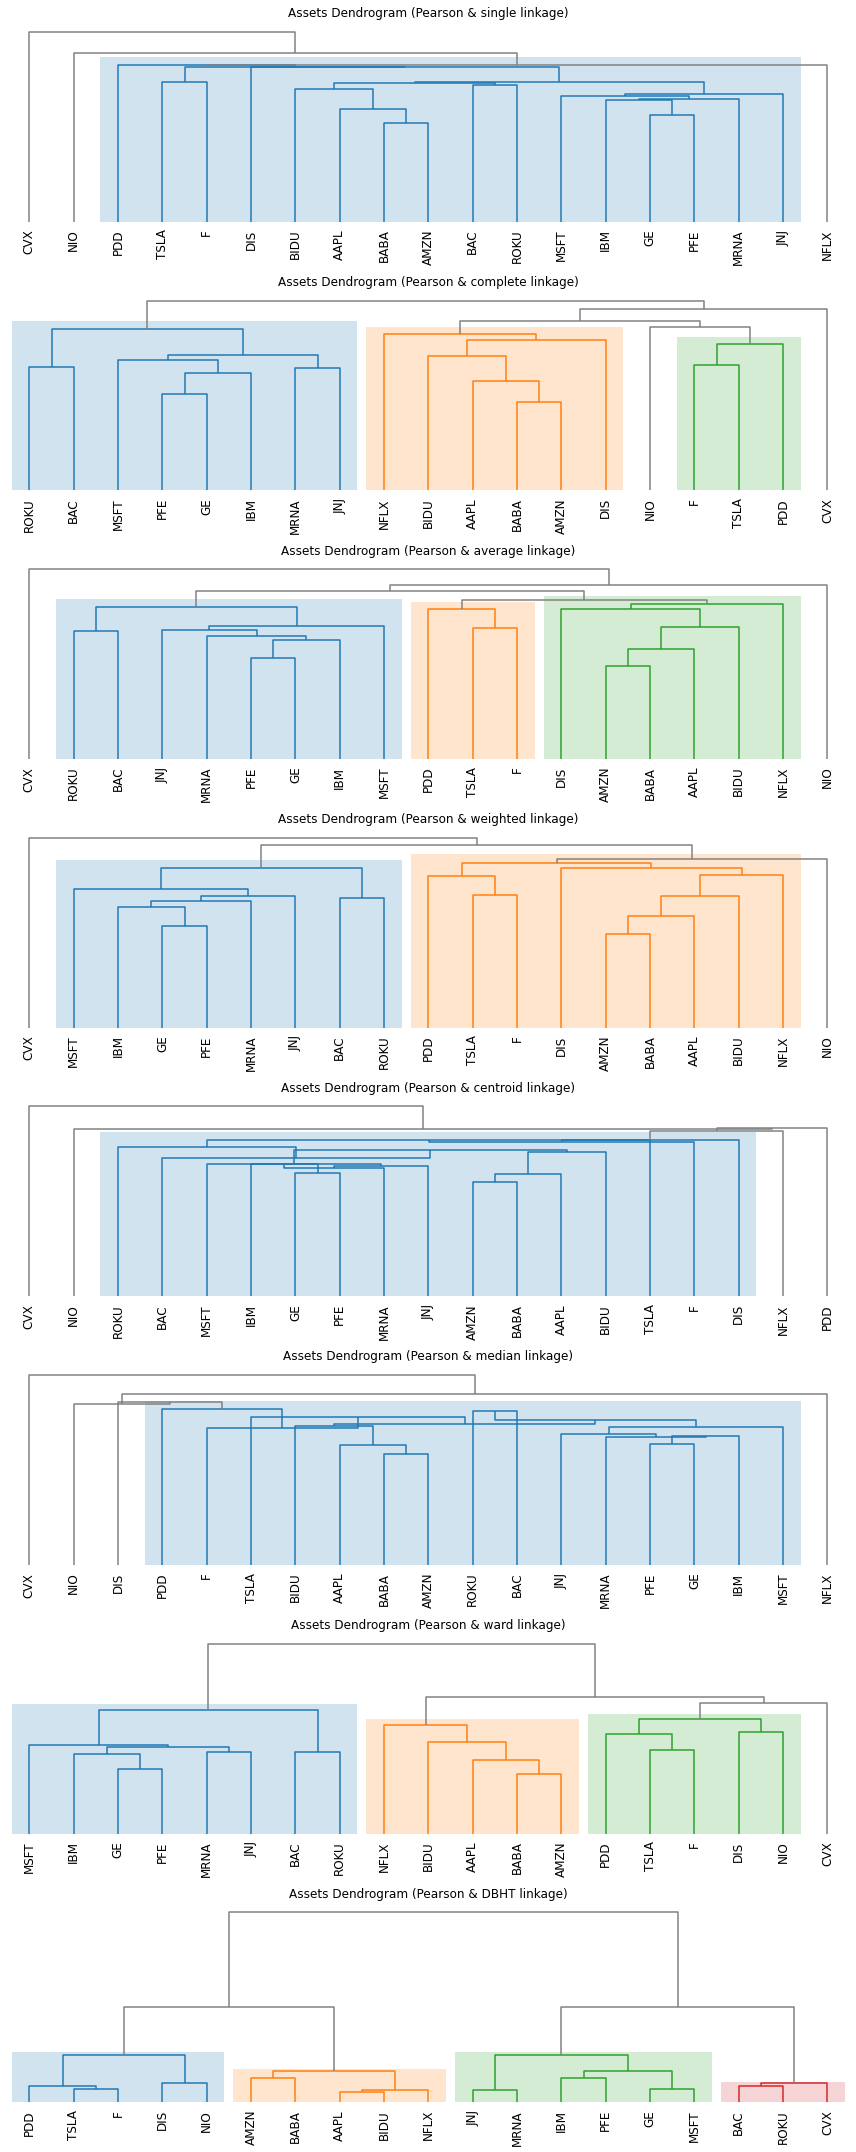

In [ ]:
import matplotlib.pyplot as plt
import riskfolio as rp
# Comparison of several linkages methods
linkages = ['single','complete','average','weighted',
            'centroid', 'median', 'ward','DBHT']
fig, ax = plt.subplots(len(linkages), 1, figsize=(12, 30))
ax = np.ravel(ax)
j = 0
for i in linkages:
    ax[j] = rp.plot_dendrogram(returns=Y,
                               codependence='pearson',
                               linkage=i,
                               k=None,
                               max_k=10,
                               leaf_order=True,
                               ax=ax[j])
    j += 1
    
plt.plot()

**plot the relationship among assets using a network**

[]

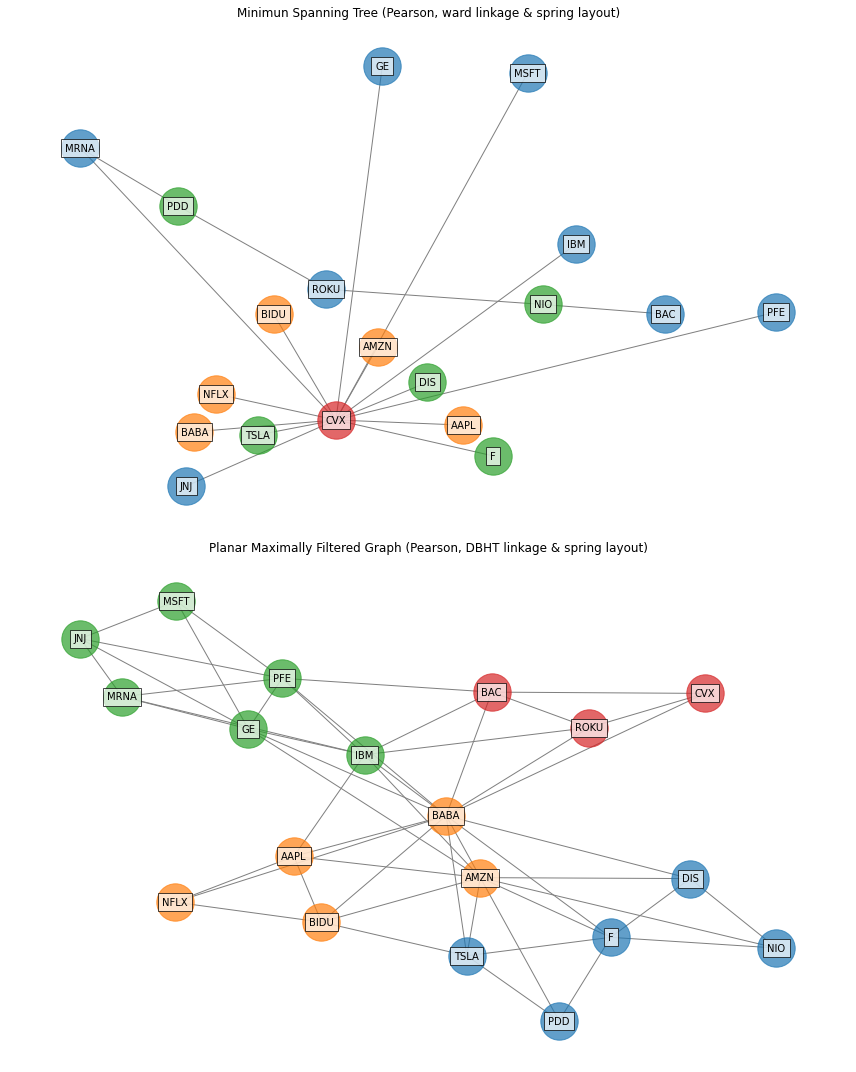

In [ ]:
# Comparison of two network graphs
linkages = ['ward','DBHT']
fig, ax = plt.subplots(len(linkages), 1, figsize=(12, 15))
ax = np.ravel(ax)
j = 0
for i in linkages:
    ax[j] = rp.plot_network(returns=Y,
                            codependence="pearson",
                            linkage=i,
                            k=None,
                            max_k=10,
                            leaf_order=True,
                            kind='spring',
                            seed=0,
                            ax=ax[j])
    j += 1
    
plt.plot()

In [ ]:
# Getting components of each cluster
clusters = rp.assets_clusters(returns=Y,
                              codependence='pearson',
                              linkage='DBHT',
                              k=None,
                              max_k=10,
                              leaf_order=True)
display(clusters.sort_values(by='Clusters'))

Assets   Clusters
2    TSLA  Cluster 1
15    PDD  Cluster 1
14    NIO  Cluster 1
4       F  Cluster 1
18    DIS  Cluster 1
17   NFLX  Cluster 2
1    AAPL  Cluster 2
13   BIDU  Cluster 2
12   BABA  Cluster 2
0    AMZN  Cluster 2
3      GE  Cluster 3
7     JNJ  Cluster 3
8    MRNA  Cluster 3
6    MSFT  Cluster 3
5     PFE  Cluster 3
9     IBM  Cluster 3
16   ROKU  Cluster 4
10    BAC  Cluster 4
11    CVX  Cluster 4